## Part I ##


Given:
$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

Proof:
$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&= \exp\left[-\frac{1}{2}\sum_{i=1}^n \phi\left(x_i^2 - 2x_i\theta + \theta^2\right) - \frac{1}{2}\tau\left(\theta^2 - 2\theta\theta_0 + \theta_0^2\right)\right] \\
&= \exp\left[-\frac{1}{2}\sum_{i=1}^n \left(\phi x_i^2 - 2\phi x_i\theta + \phi\theta^2\right) - \frac{1}{2}\left(\tau\theta^2 - 2\tau\theta\theta_0 + \tau\theta_0^2\right)\right] \\
&= \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi x_i^2 - 2\sum_{i=1}^n \phi x_i\theta + \sum_{i=1}^n \phi\theta^2 + \tau\theta^2 - 2\tau\theta\theta_0 + \tau\theta_0^2\right)\right] \\
&= \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi x_i^2 - 2\sum_{i=1}^n \phi x_i\theta + (\phi+\tau)\theta^2 - 2\tau\theta\theta_0 + \tau\theta_0^2\right)\right] \\
&= \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi x_i^2 - 2\sum_{i=1}^n \phi x_i\theta + (\phi+\tau)\theta^2\right) - \frac{1}{2}\left(- 2\tau\theta\theta_0 + \tau\theta_0^2\right)\right] \\
&= \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi x_i^2 - 2\sum_{i=1}^n \phi x_i\theta + (\phi+\tau)\theta^2\right)\right] \exp\left[\frac{1}{2}\left(\tau\theta^2 - 2\tau\theta\theta_0 + \tau\theta_0^2\right)\right] \\
&= \exp\left[-\frac{1}{2}(\tau+\phi)\theta^2 + \sum_{i=1}^n \phi x_i\theta - \frac{1}{2}\sum_{i=1}^n \phi x_i^2\right] \exp\left[\frac{1}{2}\tau\left(\theta - \theta_0\right)^2\right] \\
&= \exp\left[-\frac{1}{2}(\tau+\phi)\left(\theta^2 - 2\frac{\sum_{i=1}^n \phi x_i}{\tau+\phi}\theta\right) + \frac{1}{2}\frac{\left(\sum_{i=1}^n \phi x_i\right)^2}{\tau+\phi} - \frac{1}{2}\sum_{i=1}^n \phi x_i^2\right] \exp\left[\frac{1}{2}\tau\left(\theta - \theta_0\right)^2\right] \\
&= \exp\left[-\frac{1}{2}(\tau+\phi)\left(\theta^2 - 2\frac{\sum_{i=1}^n \phi x_i}{\tau+\phi}\theta\right)\right] \exp\left[\frac{1}{2}\frac{\left(\sum_{i=1}^n \phi x_i\right)^2}{\tau+\phi}\right] \exp\left[-\frac{1}{2}\sum_{i=1}^n \phi x_i^2\right] \exp\left[\frac{1}{2}\tau\left(\theta - \theta_0\right)^2\right] \\
&\propto \exp\left[-\frac{1}{2}(\tau+\phi)\left(\theta^2 - 2\frac{\sum_{i=1}^n \phi x_i}{\tau+\phi}\theta\right)\right] \exp\left[\frac{1}{2}\tau\left(\theta - \theta_0\right)^2\right].
\end{align*}$$




## Part II Question 1 ##


0
1
2


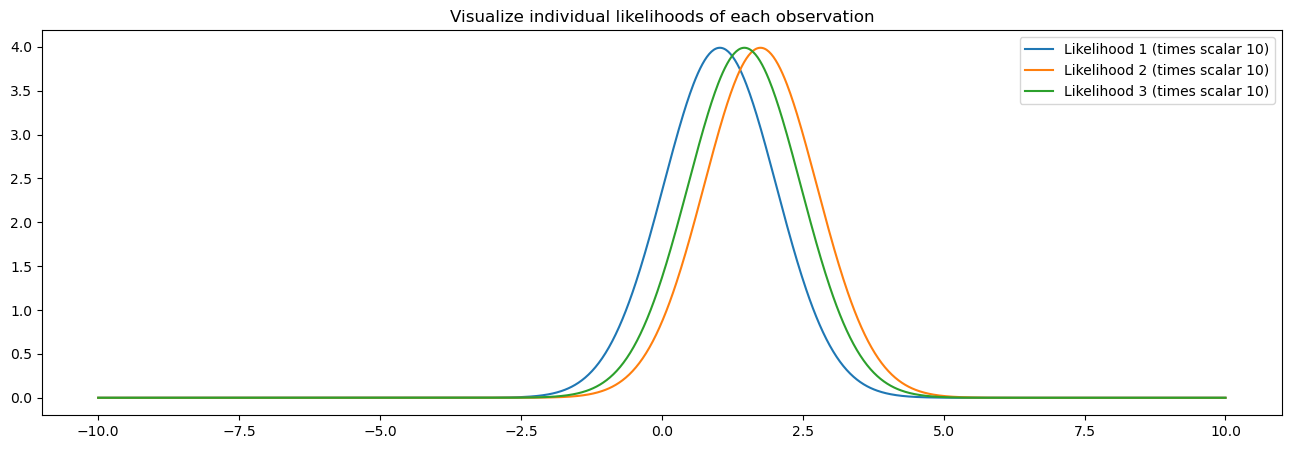

In [3]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 

likelihoods = [stats.norm(loc=xi, scale=1).pdf(parameter_domain) for xi in x[:3]]
likelihoods = np.array(likelihoods)

plt.figure(figsize=(16, 5))
for i in range(3):
    plt.plot(parameter_domain, 10 * likelihoods[i], label=f"Likelihood {i+1} (times scalar 10)")
    print(i)

plt.legend()
plt.title("Visualize individual likelihoods of each observation")
plt.show()

## Part II Question 2 ##

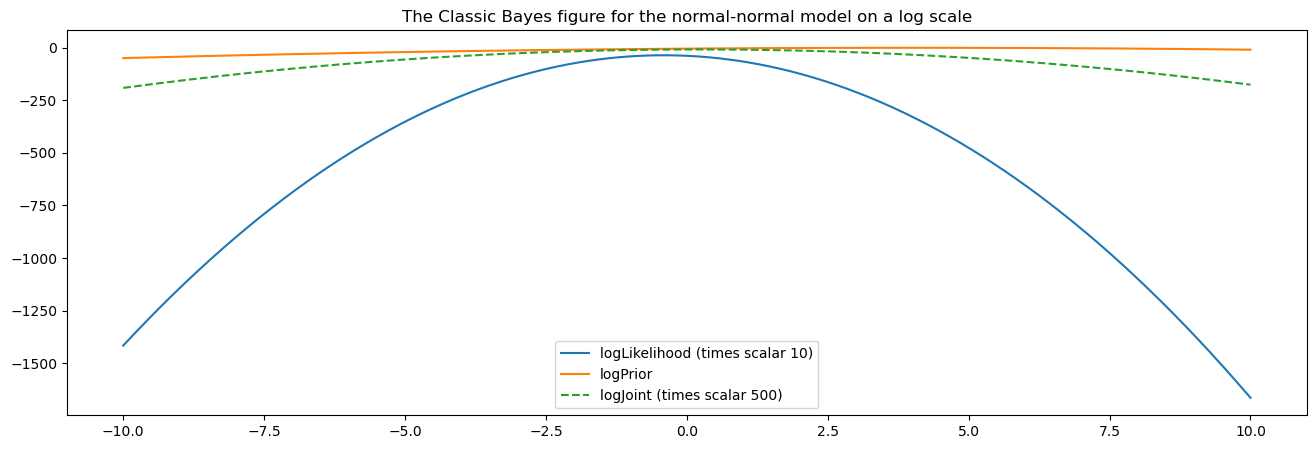

In [7]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 

log_likelihood = np.sum(stats.norm.logpdf(x[:, np.newaxis], loc=parameter_domain, scale=1), axis=0)
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)
c, c2 = 500, 10
log_joint = log_likelihood + log_prior

plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, c2 * log_likelihood, label="logLikelihood (times scalar "+str(c2)+")")
plt.plot(parameter_domain, log_prior, label="logPrior")
plt.plot(parameter_domain, log_joint, linestyle="--", label="logJoint (times scalar "+str(c)+")")
plt.legend()
plt.title("The Classic Bayes figure for the normal-normal model on a log scale")
plt.show()

## Part II Question 3 ##

According to Bayes' theorem:

$$ p(\theta|x) \propto p(x|\theta) \cdot p(\theta) $$

For a normal likelihood with a flat prior: 

$$ p(\theta|x) \propto \text{Normal Likelihood} \cdot \text{Flat Prior} $$

The normal likelihood distribution is $$ p(x|\theta) = \text{Normal}(x|\theta, \sigma^2) $$

The flat prior is $$ p(\theta) \propto 1\ $$

Thus the posterior distribution is:

$$ p(\theta|x) \propto \text{Normal}(x|\theta, \sigma^2) $$

The normalization constant can be found by ensuring that the posterior integrates to 1 over the entire parameter space.



## Part II Question 4 ##

When employing an improper prior, the (log)likelihood remains unaffected since it is determined by the data and the parameter. However, the resulting posterior becomes improper as it is a product of the improper prior and the likelihood. This improper posterior does not to integrate to one, and consequently, the posterior distribution may not qualify as a proper probability distribution. Nonetheless, if the likelihood provides enough information, the posterior can still be proper.

The marginal likelihood constant serves as the normalization constant that ensures the legitimacy of the posterior distribution. In the context of an improper prior, the marginal likelihood constant is instrumental in assessing whether the posterior is proper.

Therefore, the key difference is that the marginal likelihood constant should be considered when using an improper prior. With an improper prior, the marginal likelihood constant is crucial for evaluating whether the posterior is proper.